In [1]:
import calendar

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_context("paper", font_scale= 1.5)

In [25]:
data = pd.read_csv('road_accidents.csv')
data.head()

,status,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,Unvalidated,2021010287148,2021,010287148,521508.0,193079.0,NaN,NaN,1,3,...,0,4,7,4,1,0,-1,1,-1,-1
1,Unvalidated,2021010287149,2021,010287149,535379.0,180783.0,NaN,NaN,1,2,...,5,4,1,1,0,0,-1,1,-1,-1
2,Unvalidated,2021010287151,2021,010287151,529701.0,170398.0,NaN,NaN,1,2,...,5,4,1,1,0,0,-1,1,-1,-1
3,Unvalidated,2021010287155,2021,010287155,525312.0,178385.0,NaN,NaN,1,1,...,4,4,1,1,0,0,-1,1,-1,-1
4,Unvalidated,2021010287157,2021,010287157,512144.0,171526.0,NaN,NaN,1,3,...,0,4,1,1,0,0,-1,1,-1,-1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42358 entries, 0 to 42357
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   status                                       42358 non-null  object 
 1   accident_index                               42358 non-null  object 
 2   accident_year                                42358 non-null  int64  
 3   accident_reference                           42358 non-null  object 
 4   location_easting_osgr                        41789 non-null  float64
 5   location_northing_osgr                       41789 non-null  float64
 6   longitude                                    0 non-null      float64
 7   latitude                                     0 non-null      float64
 8   police_force                                 42358 non-null  int64  
 9   accident_severity                            42358 non-null  int64  
 10

In [27]:
data.isnull().sum().any


<bound method NDFrame._add_numeric_operations.<locals>.any of status                                             0
accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                            569
location_northing_osgr                           569
longitude                                      42358
latitude                                       42358
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway              

In [28]:
data.drop(['location_easting_osgr', 'location_northing_osgr', 'longitude','latitude'], axis=1, inplace=True)
data.columns

Index(['status', 'accident_index', 'accident_year', 'accident_reference',
       'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [29]:
data.dtypes

status                                         object
accident_index                                 object
accident_year                                   int64
accident_reference                             object
police_force                                    int64
accident_severity                               int64
number_of_vehicles                              int64
number_of_casualties                            int64
date                                           object
day_of_week                                     int64
time                                           object
local_authority_district                        int64
local_authority_ons_district                   object
local_authority_highway                        object
first_road_class                                int64
first_road_number                               int64
road_type                                       int64
speed_limit                                     int64
junction_detail             

In [30]:
data['date']= pd.to_datetime(data['date']+' '+data['time'])
data['date'].head()


0   2021-01-01 02:05:00
1   2021-01-01 03:30:00
2   2021-01-01 04:07:00
3   2021-01-01 04:26:00
4   2021-01-01 03:10:00
Name: date, dtype: datetime64[ns]

In [31]:
data.drop(['time','day_of_week', 'accident_year'], axis=1,inplace=True)
data.dtypes

status                                                 object
accident_index                                         object
accident_reference                                     object
police_force                                            int64
accident_severity                                       int64
number_of_vehicles                                      int64
number_of_casualties                                    int64
date                                           datetime64[ns]
local_authority_district                                int64
local_authority_ons_district                           object
local_authority_highway                                object
first_road_class                                        int64
first_road_number                                       int64
road_type                                               int64
speed_limit                                             int64
junction_detail                                         int64
junction

In [32]:
#search for duplicates
data.duplicated().sum()

0

In [33]:
#create dataset with only major accidents
major_accidents = data[data['number_of_casualties']>=3]
major_accidents.head()

,status,accident_index,accident_reference,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,local_authority_district,local_authority_ons_district,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
1,Unvalidated,2021010287149,010287149,1,2,2,3,2021-01-01 03:30:00,-1,E09000030,...,5,4,1,1,0,0,-1,1,-1,-1
2,Unvalidated,2021010287151,010287151,1,2,2,4,2021-01-01 04:07:00,-1,E09000022,...,5,4,1,1,0,0,-1,1,-1,-1
41,Unvalidated,2021010288667,010288667,1,3,3,3,2021-01-14 06:33:00,-1,E09000016,...,0,4,2,2,0,0,-1,1,-1,-1
80,Unvalidated,2021010288712,010288712,1,3,2,4,2021-01-14 12:22:00,-1,E09000027,...,5,1,2,2,0,0,-1,1,-1,-1
105,Unvalidated,2021010287345,010287345,1,2,1,4,2021-03-01 00:15:00,-1,E09000028,...,0,4,1,4,0,0,-1,1,-1,-1


In [34]:
#verifying the shape
major_accidents.shape

(2151, 30)

In [36]:
import calendar

#number of accidents per month
accidents_month=major_accidents.groupby(major_accidents['date'].dt.month).count().date

#Replace the integer months by month names
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      237
February     223
March        253
April        315
May          389
June         338
July          52
August        60
September     79
October       59
November      69
December      77
Name: date, dtype: int64

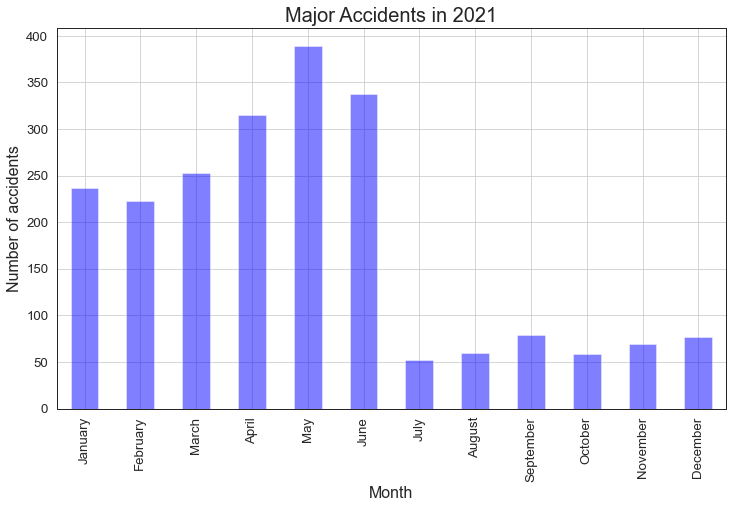

In [40]:
# plot accidents per month
accidents_month.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x,y labels
plt.title('Major Accidents in 2021', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)
plt.show()


The graph show that the major accidents occur in the first half of the year and April, May and July are the principal months.

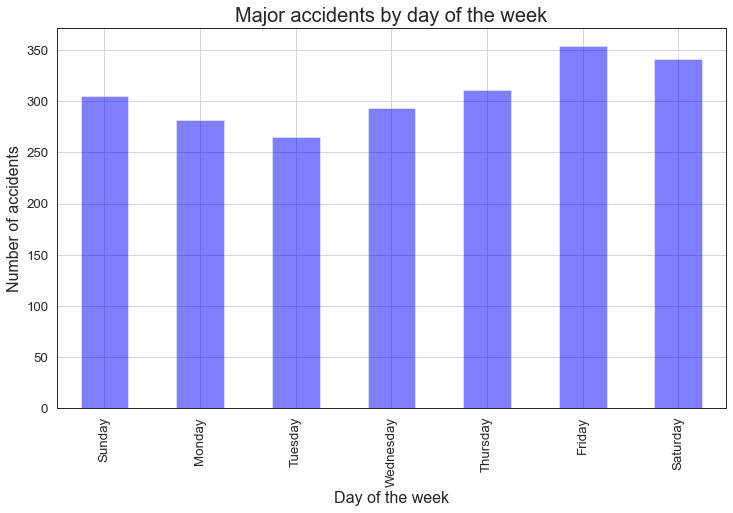

In [55]:
#number of accidents per day of the week
accidents_day=major_accidents.groupby(major_accidents['date'].dt.dayofweek).count().date

#replace the day integers by day names
labels=('Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday')
accidents_day.index=[labels[x] for x in range(0,7)]

#plot accidents per day
accidents_day.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x,y labels
plt.title('Major accidents by day of the week', fontsize=20)
plt.xlabel('Day of the week', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)


As show in the plot above, the major accidents occur on weekends with an average of more than 310 car accidents, including Friday.
Weekdays, excepting Mondays, this number is 270 and 290, which I considered very high.

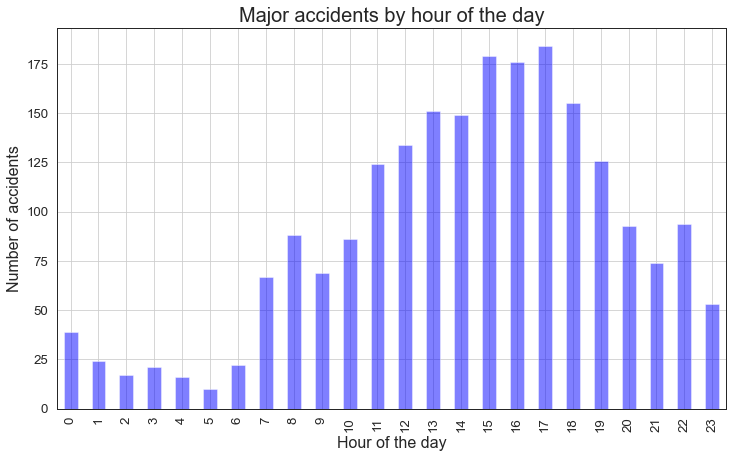

In [42]:
#number os accidents per hour
accidents_hour=major_accidents.groupby(major_accidents['date'].dt.hour).count().date

#plot accidents per hour
accidents_hour.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x,y labels
plt.title('Major accidents by hour of the day', fontsize=20)
plt.xlabel('Hour of the day', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)

The accidents mostly occur between the hour 15:00 and 17:00

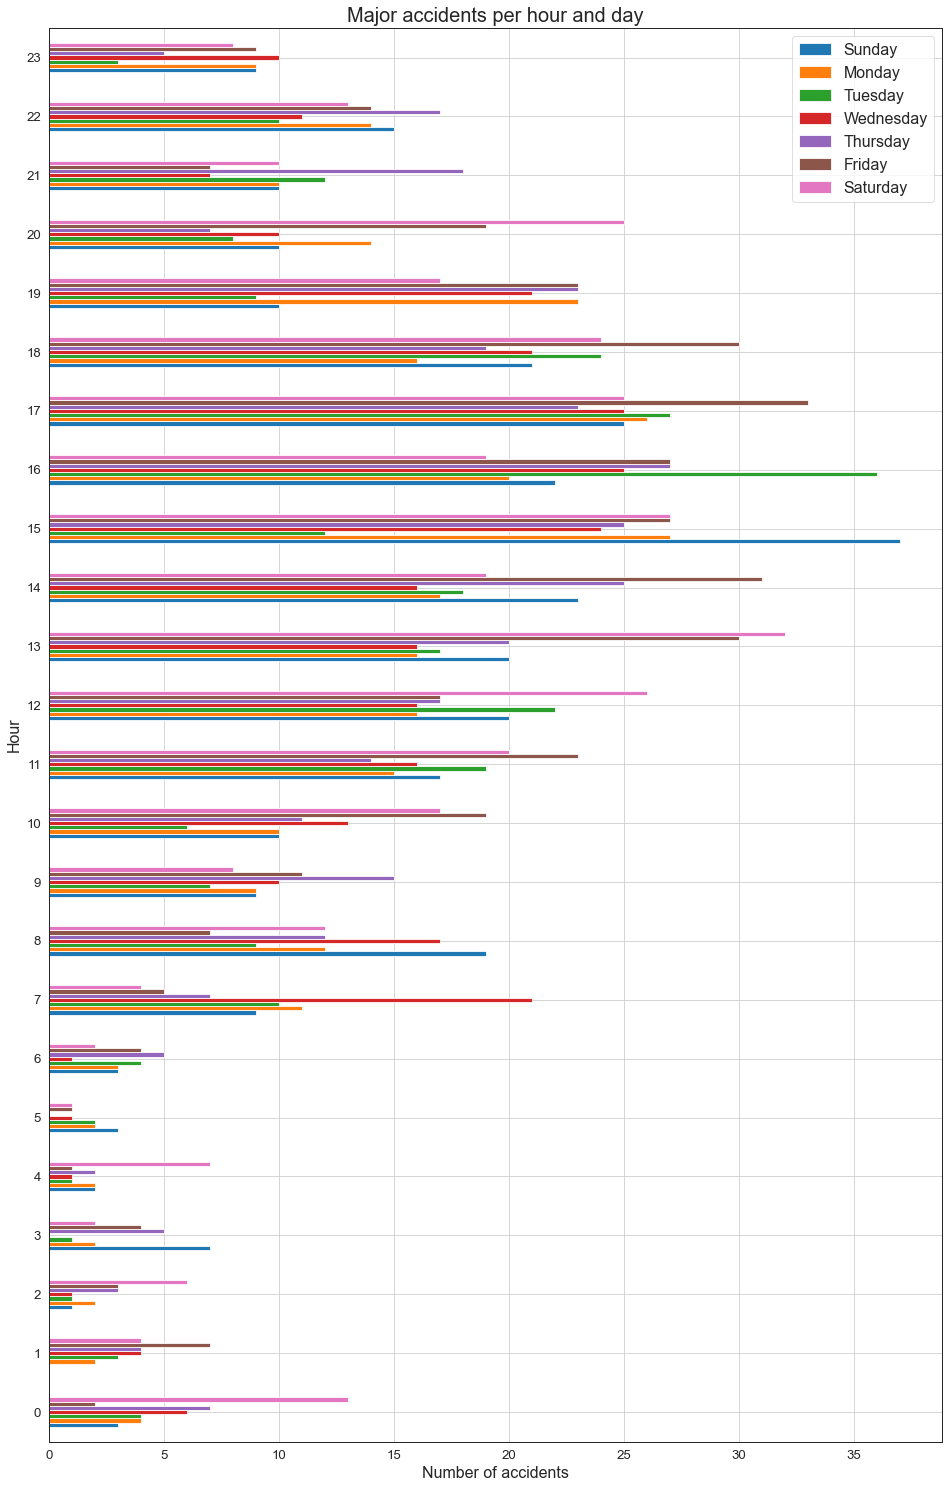

In [56]:
#number of accidents per hour and day
accidents_hour_day= major_accidents.groupby([major_accidents['date'].dt.hour.rename('hour'), major_accidents['date'].dt.dayofweek.rename('day')]).count().date

#plot accidents per hour and day
accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

#title and x,y labels
labels=('Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday')
plt.legend([labels[x] for x in range(0,7)], fontsize=16)
plt.title('Major accidents per hour and day', fontsize=20)
plt.xlabel('Number of accidents', fontsize=16)
plt.ylabel('Hour', fontsize=16)
plt.grid(True)

On the weekends there are more accidents in later afternoon. At weekdays, there are more accidents in the beginning of
the afternoon.

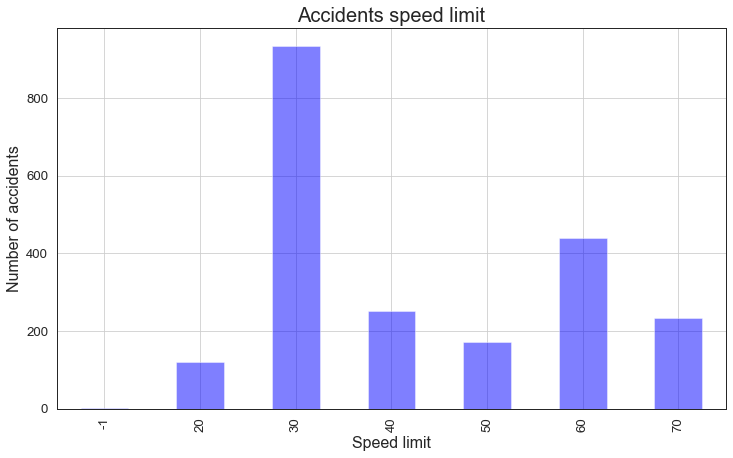

In [57]:
#verify speed limits conditions
speed_limit=major_accidents.groupby(major_accidents['speed_limit']).count().number_of_vehicles

#plot accidents by light conditions
speed_limit.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x, y labels
plt.title('Accidents speed limit', fontsize=20)
plt.xlabel('Speed limit', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)

Most of the accidents happened in the speed limit of 30 km/h.

In [65]:
#replace road type integer to string
roadtype_to_string={1:'Roundabout', 2:'One way street', 3:'Dual carrigeway', 6:'Single carrigeway', 7:'Slip road', 9:'Unknown'}
major_accidents['road_type'].replace(roadtype_to_string, inplace=True)
major_accidents['road_type'].head()

/Users/vivianetrindade/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


1        Dual carrigeway
2      Single carrigeway
41       Dual carrigeway
80     Single carrigeway
105    Single carrigeway
Name: road_type, dtype: object

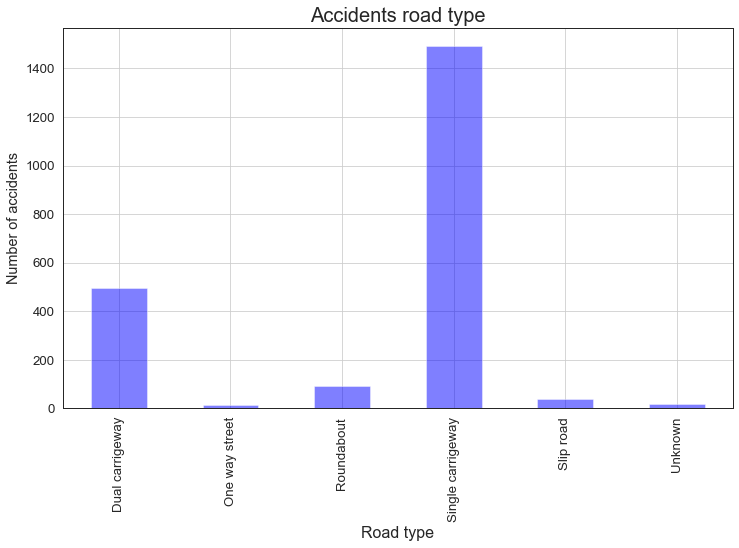

In [66]:
#accidents per road type
road_type=major_accidents.groupby(major_accidents['road_type']).count().number_of_vehicles


#plot accidents by road type
road_type.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x, y labels
plt.title('Accidents road type', fontsize=20)
plt.xlabel('Road type', fontsize=16)
plt.ylabel('Number of accidents')
plt.grid(True)

The great number of major accidents occur in single carriageway so one possible solution could be transformed them in dual
carriageway.

In [67]:
#replace special conditions integer to string
special_condition_to_string={0:'none', 1:'Auto traffic out', 2:'Auto signal part defective', 3:'Road sign or marking defective',
                             4:'Roadworks', 5:'Road surface defective', 6:'Oil or diesel', 7:'Mud', -1:'Data missing', 9:'Unknown'}
major_accidents['special_conditions_at_site'].replace(special_condition_to_string, inplace=True)
major_accidents['special_conditions_at_site'].head()

/Users/vivianetrindade/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


1      none
2      none
41     none
80     none
105    none
Name: special_conditions_at_site, dtype: object

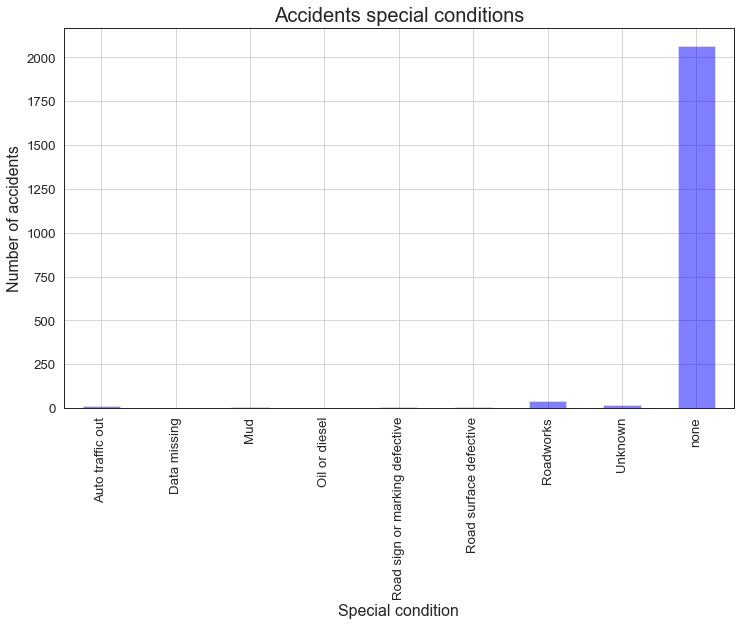

In [68]:
special_condition=major_accidents.groupby(major_accidents['special_conditions_at_site']).count().status

#plot accidents by special conditions road
special_condition.plot(kind='bar', figsize=(12,7), color='blue', alpha=0.5)

#title and x, y labels
plt.title('Accidents special conditions', fontsize=20)
plt.xlabel('Special condition', fontsize=16)
plt.ylabel('Number of accidents', fontsize=16)
plt.grid(True)